In [5]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms

from dataset import MyDataset

warnings.filterwarnings('ignore')

%matplotlib inline
%autoreload 2

# 画像をいくつか可視化する
- サイズは？
- 物体の数は？
- 大きさは？


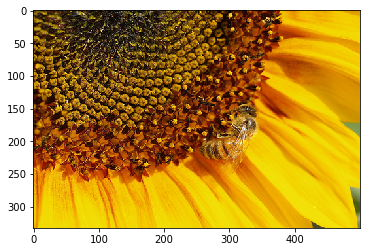

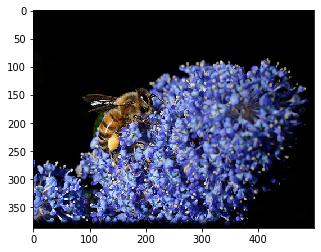

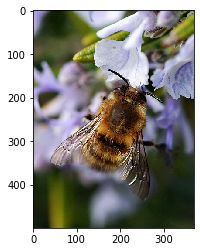

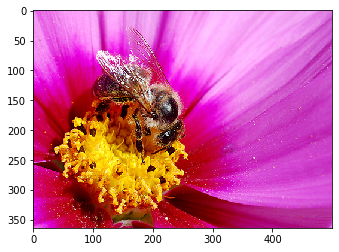

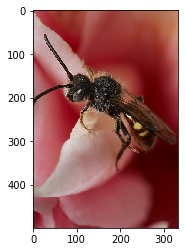

In [6]:
from PIL import Image

data_path = Path('hymenoptera_data/train')
file_path_list = list(data_path.glob('**/*.jpg'))

for idx in range(5):
    file_path = file_path_list[idx]
    image = Image.open(file_path)

    npimg = np.array(image)

    plt.imshow(npimg)
    plt.show()

# Datasetを活用する

In [7]:
from torchvision.utils import make_grid

train_path = Path('hymenoptera_data/train')

train_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),  # 同じサイズに揃える
    transforms.ToTensor()
])

train_dataset = MyDataset(train_path, train_transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# batch_size分だけ取り出す
images, labels = next(iter(train_loader))

print(images.size(), labels.size())


out = make_grid(images)
print(out.shape)

torch.Size([8, 3, 256, 256]) torch.Size([8])
torch.Size([3, 260, 2066])


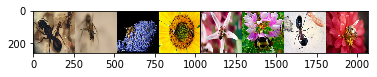

In [8]:
npimg = out.numpy().transpose(1, 2, 0)

plt.imshow(npimg)
plt.show()

おわり